In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
#%matplotlib nbagg

# Finding the value of $\pi$

In [2]:
N = 10000
r = 1
c = [2,4]

xs = (c[0]-r)+2*r*np.random.rand(N)
ys = (c[1]-r)+2*r*np.random.rand(N)

inside = (xs-c[0])**2 + (ys-c[1])**2 <= r**2
print(4*inside.sum()/len(inside))

3.1252


<IPython.core.display.Javascript object>


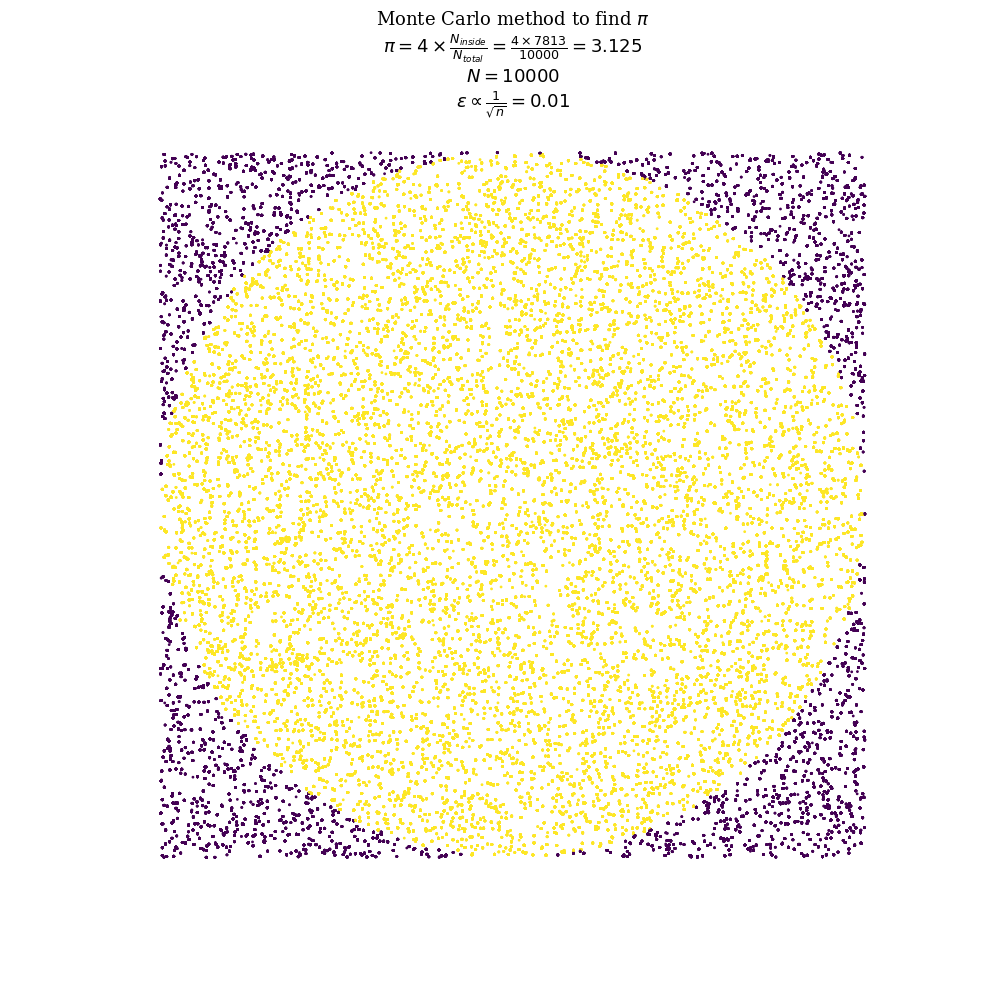

In [3]:
fig = plt.figure(figsize=(10,10))
step = 200
frames = [(i+1)*step for i in range(int(N/step))]

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 13}

def init_func():
    pass

def draw(i):
    plt.scatter(xs[0:i], ys[0:i], c=inside[0:i], s=1)
    plt.title("Monte Carlo method to find $\pi$\n" +
              "$\pi = 4\\times \\frac{N_{inside}}{N_{total}} = $" +
              "$ \\frac{4\\times%.i}{%.i} = $" %(inside[0:i].sum(), len(inside[0:i])) + 
              f"${4*inside[0:i].sum()/len(inside[0:i]):.3f}$\n$" +
              f"N = {len(inside[0:i])}$\n" +
              "$\epsilon \propto  \\frac{1}{\\sqrt{n}} = %.2f$"%(1/np.sqrt(len(inside[0:i])) ),
              fontdict=font_title
             ) 
    plt.axis("off")
    plt.axis("equal")

animation = FuncAnimation(plt.gcf(), draw, frames=frames, interval=10, repeat=False, init_func=init_func)
#animation.save('./Montecarlo_pi.gif', writer='ffmpeg')

# Monte Carlo Integration

The integration of the function $f(x)$ in the open interval $(a,b)$ can be estimated by using the Monte Carlo method:

\begin{equation}
    \int_a^b f(x)dx \approx \frac{b-a}{N} \sum_{i=1}^{N}f(x_i)
\end{equation}

where the $x_i$ are random numbers such that $X \sim U(a,b)$. We can also find the value of the integral not by using the expected value of $f(x)$ but using the proportion of points under $f(x)$ respect to the total amount of points. But this case the function must be positive in the open interval $(a,b)$, it is $f(x) \geq 0 $ for $x \in (a,b)$:

\begin{equation}
    \int_a^b f(x)dx \approx M(b-a)\frac{N_{in}}{N_{total}}
\end{equation}

$M$ is the maximum value of $f(x)$ in the interval $(a,b)$.

In [5]:
def mc1_integrate(f, a, b, N=1000000, **kwards):
    """
    Retunrs the integrate of f(x) in the interval (a,b)
    by using the Monte Carlo method with the expected 
    value of the function f. 
    f: funct
        Function to integrate.
    a: float
        Lower extreme of integration.
    b: float
        Upper extreme of integration.
    N: int
        Number of iterations for the Monte Carlo method.
        Default 1000000.
    **kwards: args
        Args for f.
    """
    
    xs = a + (b-a)*np.random.rand(N)
    ys = f(xs, **kwards)
    return (b-a)*np.sum(ys)/N


def mc2_integrate(f, a, b, N=1000000, **kwards):
    """
    Retunrs the integrate of f(x) in the interval (a,b)
    by using the Monte Carlo method with the proportion
    of points under the curve f respect to the total amount
    of points. 
    f: funct
        Function to integrate.
    a: float
        Lower extreme of integration.
    b: float
        Upper extreme of integration.
    N: int
        Number of iterations for the Monte Carlo method.
        Default 1000000.
    **kwards: args
        Args for f.
    """
    #Maximum value of f in the interval (a,b).
    M  = np.max(f(np.linspace(a, b, 100), **kwards))
    
    #Random numbers in [a,b]x[0,M]
    xs = a + (b-a)*np.random.rand(N)
    ys = M*np.random.rand(N)
    
    inside = ys <= f(xs, **kwards)
    return M*(b-a)*inside.sum()/N

<h3>Example</h3>
Lets test this method by integrating the function $f(x) = 2\sqrt{1 - x^2}$ in the interval $(-1,1)$. The result of this integral equals $\pi$: 

\begin{equation}
    \int_{-1}^1 \sqrt{1 - x^2}dx = \frac{\pi}{2}
\end{equation}

\begin{equation}
    2\int_{-1}^1 \sqrt{1 - x^2}dx = \pi
\end{equation}

In [6]:
def func(x, r):
    return 2*np.sqrt(r**2-x**2)

dic = {"r":1}

In [12]:
step = 1000
Ns   = range(1, 1000000+step, step)
a = -1
b =  1

pi_1 = []
pi_2 = []

for n in Ns:
    pi_1.append(mc1_integrate(func, a, b, N=n, **dic))
    pi_2.append(mc2_integrate(func, a, b, N=n, **dic))

<IPython.core.display.Javascript object>


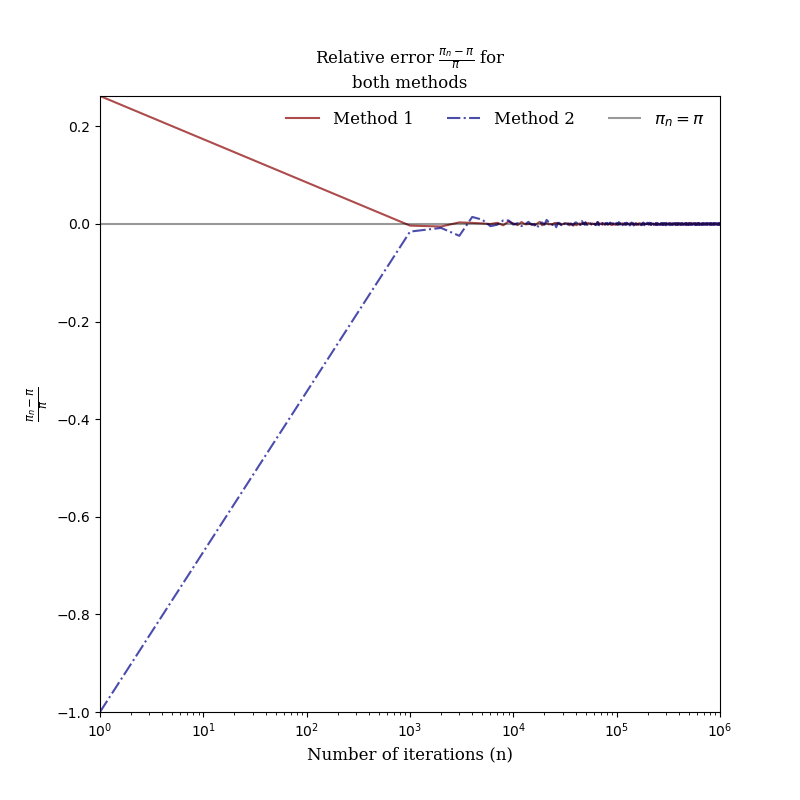

In [14]:
fig = plt.figure(figsize=(8,8))
plt.plot(Ns, (np.array(pi_1)-np.pi)/np.pi, "-",  label="Method 1",    color="darkred",  alpha=0.7)
plt.plot(Ns, (np.array(pi_2)-np.pi)/np.pi, "-.", label="Method 2",    color="darkblue", alpha=0.7)
plt.hlines(0, min(Ns), max(Ns),                  label="$\pi_n=\pi$", color="black",    alpha=0.4)

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 12}

font_label = {
        'family': 'serif',
        'weight': 'normal',
        'size': 12}

plt.xscale("log")
plt.xlabel("Number of iterations (n)", fontdict=font_label)
plt.ylabel("$\\frac{\pi_n-\pi}{\pi}$", fontdict=font_label)
plt.title("Relative error $\\frac{\pi_n-\pi}{\pi}$ for \n" + 
          "both methods", fontdict=font_title)
plt.xlim(min(Ns), max(Ns))
plt.ylim(min(min((np.array(pi_1)-np.pi)/np.pi), min((np.array(pi_2)-np.pi)/np.pi)),
         max(max((np.array(pi_1)-np.pi)/np.pi), max((np.array(pi_2)-np.pi)/np.pi)))
plt.legend(loc="best", shadow=True, ncol=3, prop=font_label, frameon=False)

# Monte Carlo simulation for finances

In [2]:
#Importing pandas_datareader
try:
    from pandas_datareader import data as pdr
except:
    !pip install pandas-datareader -q
    from pandas_datareader import data as pdr

#Importing yfinance
try:
    import yfinance as yfin
except:
    !pip install yfinance -q
    import yfinance as yfin

yfin.pdr_override()
import pandas as pd
import datetime as dt

In [3]:
days = 365
end   = pd.Timestamp.today()
start = end - pd.Timedelta(days=days)
start = start.strftime('%Y-%m-%d')
end   = end.strftime('%Y-%m-%d')
print(f"start = {start} \nEnd   = {end}")

start = 2022-07-08 
End   = 2023-07-08


In [4]:
SPY_data = pdr.get_data_yahoo('SPY', start=start, end=end)[["Adj Close"]].copy()
SPY_data.tail()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2023-06-30,443.279999
2023-07-03,443.790009
2023-07-05,443.130005
2023-07-06,439.660004
2023-07-07,438.549988


In [5]:
#SPY_data["returns"] = np.log(SPY_data["Adj Close"]/SPY_data["Adj Close"].shift(1))
SPY_data["returns"] = SPY_data["Adj Close"]/SPY_data["Adj Close"].shift(1) - 1

In [6]:
SPY_data.dropna(inplace=True)
SPY_data

,Adj Close,returns
Date,,
2022-07-11,378.056458,-0.011424
2022-07-12,374.711060,-0.008849
2022-07-13,372.743195,-0.005252
2022-07-14,371.837952,-0.002429
2022-07-15,378.941956,0.019105
...,...,...
2023-06-30,443.279999,0.011801
2023-07-03,443.790009,0.001151
2023-07-05,443.130005,-0.001487


To apply the following code it is needed for the returns to be normaly distributed. Here we are going to test normality by using the Shapiro-Wilk Test with a $90%$ confidence level. If the $p-$value is grater than $0.05$ then we can assume that the returns are normaly distributed with a $90%$ confidence level. 

<IPython.core.display.Javascript object>


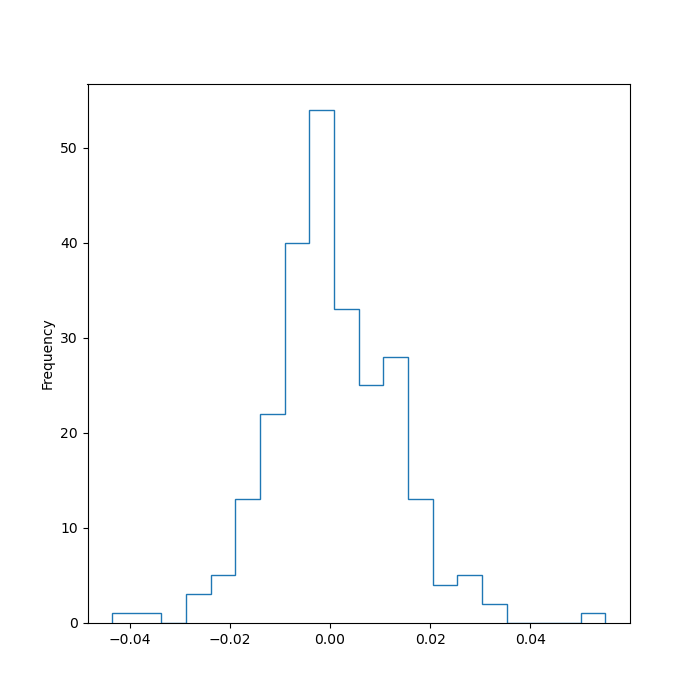

<AxesSubplot:ylabel='Frequency'>

In [7]:
#why it is not normal distributed?
fig = plt.figure(figsize=(7,7))
SPY_data["returns"].plot(kind="hist", histtype='step', bins=20)

In [8]:
from scipy.stats import shapiro
shapiro(SPY_data["returns"])

ShapiroResult(statistic=0.9823777079582214, pvalue=0.003432626836001873)

In [9]:
#The value to start the simulation is the first value for the SPY
#which is for d=0 since the simulations starts for the date in "start"
d = 0
p0 = SPY_data["Adj Close"].iloc[d]
print(f"SPY value for {SPY_data.index[d].strftime('%Y-%m-%d')} = {p0:.2f}")

#Days to simulate and number of simulations
T  = 365
N  = 1000

#The mean value and the standard deviation from the returns
mean = SPY_data["returns"].mean()
std  = SPY_data["returns"].std()
print(f"returns mean = {mean}" + 
    f"\nretuns std   = {std}")

#Matrix to save the simulations,
#the first value of each simulation is p0
ps = np.zeros_like([], shape=(N,T))
ps[:,0] = p0

#Monte Carlo simulation
for d in range(1,T):
    ps[:,d] = ps[:,d-1]*(1 + np.random.normal(loc=mean, scale=std, size=N))

SPY value for 2022-07-11 = 378.06
returns mean = 0.000621905923812649
retuns std   = 0.01220549112793125


The 90% interval is: (313.17, 667.96)


<IPython.core.display.Javascript object>


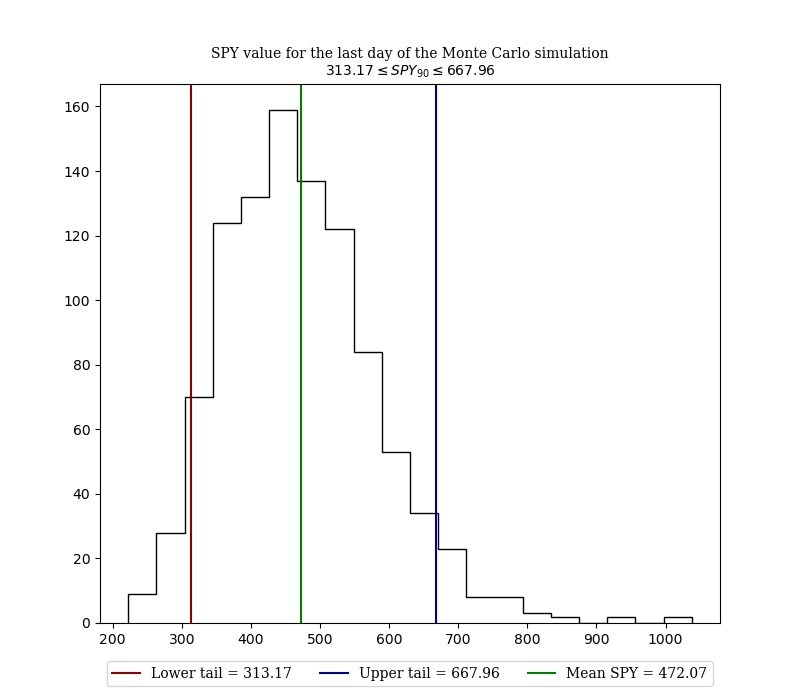

In [10]:
#a 95% confidence interval for the predicted value the last day (today)
width_interval = 90
lower_tail, upper_tail = np.percentile(ps[:,-1], [(100-width_interval)/2, (100+width_interval)/2])
print(f"The {width_interval}% interval is: ({lower_tail:.2f}, {upper_tail:.2f})")

#plot
plt.figure(figsize=(8,7))
font_label = {
        'family': 'serif',
        'weight': 'normal',
        'size': 10}

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 10}

plt.hist(ps[:,-1], histtype='step', bins=20, color="black")
plt.title(f"SPY value for the last day of the Monte Carlo simulation\n" + 
          "$%.2f\leq SPY_{%.i}\leq %.2f$"%(lower_tail, width_interval, upper_tail),
          fontdict=font_title)
plt.axvline(lower_tail,        color="darkred",  label=f"Lower tail = {lower_tail:.2f}")
plt.axvline(upper_tail,        color="darkblue", label=f"Upper tail = {upper_tail:.2f}")
plt.axvline(np.mean(ps[:,-1]), color="green",    label=f"Mean SPY = {np.mean(ps[:,-1]):.2f}")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.13), prop=font_label, ncol=3)

<IPython.core.display.Javascript object>


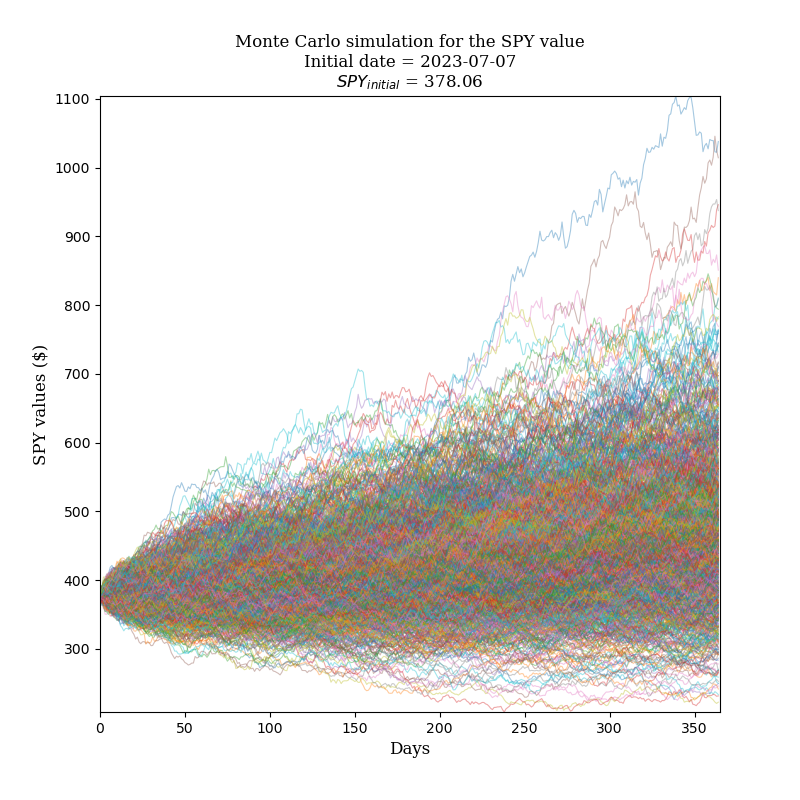

Text(0.5, 1.0, 'Monte Carlo simulation for the SPY value\nInitial date = 2023-07-07\n$SPY_{initial}$ = 378.06')

In [11]:
fig = plt.figure(figsize=(8,8))
font_label = {
        'family': 'serif',
        'weight': 'normal',
        'size': 12}

font_title = {
        'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 12}

plot = plt.plot(ps.T, linewidth=0.8, alpha=0.4)
plt.xlim(0, T)
plt.ylim(min(ps[:,1:].flatten()), max(ps[:,1:].flatten()))
plt.xlabel("Days", fontdict=font_label)
plt.ylabel("SPY values ($)", fontdict=font_label)
plt.title("Monte Carlo simulation for the SPY value\n" + 
          f"Initial date = {SPY_data.index[-1].strftime('%Y-%m-%d')}\n" + 
          "$SPY_{initial}$ = %.2f"%p0, fontdict=font_title)